In [8]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots


file_path = 'bike-sharing-hourly.csv'
bike_data = pd.read_csv(file_path)

bike_data.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [9]:
#EDA cells

# 1. Hourly Usage by Day of the Week (Casual and Registered)
hourly_weekday_casual = bike_data.groupby(['hr', 'weekday'])['casual'].mean().reset_index()
hourly_weekday_registered = bike_data.groupby(['hr', 'weekday'])['registered'].mean().reset_index()

hourly_weekday_fig = go.Figure()

# Add Casual data
hourly_weekday_fig.add_trace(go.Scatter(
    x=hourly_weekday_casual['hr'],
    y=hourly_weekday_casual['casual'],
    mode='lines+markers',
    name='Casual',
    line=dict(color='skyblue'),
))

# Add Registered data
hourly_weekday_fig.add_trace(go.Scatter(
    x=hourly_weekday_registered['hr'],
    y=hourly_weekday_registered['registered'],
    mode='lines+markers',
    name='Registered',
    line=dict(color='salmon'),
))

hourly_weekday_fig.update_layout(
    title="Average Hourly Bike Rentals by Day of the Week (Casual vs Registered)",
    xaxis_title="Hour of Day",
    yaxis_title="Average Rentals",
    template='plotly_dark',
)

# 2. Weekly and Seasonal Usage Trends (Casual and Registered)
weekly_seasonal = bike_data.groupby(['season', 'weekday']).agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

weekly_seasonal_fig = px.bar(
    weekly_seasonal,
    x='weekday',
    y=['casual', 'registered'],
    color='season',
    title='Weekly Bike Rentals Across Seasons (Casual and Registered)',
    barmode='group',
    template='plotly_dark'
)

weekly_seasonal_fig.update_layout(
    xaxis_title="Day of the Week",
    yaxis_title="Average Bike Rentals",
    legend_title="Season"
)

# 3. Hourly Usage: Casual vs Registered Users
hourly_user_type_fig = go.Figure()
hourly_user_type = bike_data.groupby(['hr']).agg({'casual': 'mean', 'registered': 'mean'}).reset_index()

hourly_user_type_fig.add_trace(go.Scatter(
    x=hourly_user_type['hr'],
    y=hourly_user_type['casual'],
    mode='lines',
    name='Casual',
    line=dict(color='skyblue'),
))

hourly_user_type_fig.add_trace(go.Scatter(
    x=hourly_user_type['hr'],
    y=hourly_user_type['registered'],
    mode='lines',
    name='Registered',
    line=dict(color='salmon'),
))

hourly_user_type_fig.update_layout(
    title="Hourly Usage Pattern: Casual vs Registered Users",
    xaxis_title="Hour of Day",
    yaxis_title="Average Rentals",
    template='plotly_dark'
)

# 4. Impact of Weather on Bike Rentals (Corrected and separated for Casual/Registered)
weather_bar_fig = go.Figure()

# Casual Users
weather_bar_fig.add_trace(go.Bar(
    x=weather_impact_fixed['weathersit'],
    y=weather_impact_fixed['casual'],
    name='Casual Users',
    marker_color='skyblue',
))

# Registered Users
weather_bar_fig.add_trace(go.Bar(
    x=weather_impact_fixed['weathersit'],
    y=weather_impact_fixed['registered'],
    name='Registered Users',
    marker_color='salmon',
))

weather_bar_fig.update_layout(
    title="Impact of Weather on Bike Rentals (Casual and Registered)",
    xaxis_title="Weather Situation",
    yaxis_title="Average Rentals",
    template='plotly_dark',
    barmode='group'
)

# 5. Temperature and Humidity Impact (Separate Casual and Registered)
temp_humidity_rentals_fig = px.scatter(
    bike_data, x='temp', y='casual',
    color='hum', size='registered',
    title="Impact of Temperature on Rentals (Casual and Registered)",
    template='plotly_dark'
)
temp_humidity_rentals_fig.update_layout(
    xaxis_title="Normalized Temperature",
    yaxis_title="Casual Rentals",
    coloraxis_colorbar=dict(title="Humidity"),
    legend_title="Registered Rentals"
)

# Display updated visualizations
hourly_weekday_fig.show()
weekly_seasonal_fig.show()
hourly_user_type_fig.show()
weather_bar_fig.show()
temp_humidity_rentals_fig.show()


NameError: name 'weather_impact_fixed' is not defined

In [10]:
import plotly.express as px

# Violin plot data preparation
violin_plot_fig = px.violin(
    bike_data,
    x='season',
    y='casual',
    color='season',
    box=True,  # Include a boxplot inside the violin plot
    points='all',  # Show all points
    title='Distribution of Casual Rentals Across Seasons',
    template='plotly_dark'
)

# Adding for registered users in the same way
violin_plot_registered_fig = px.violin(
    bike_data,
    x='season',
    y='registered',
    color='season',
    box=True,  # Include a boxplot inside the violin plot
    points='all',  # Show all points
    title='Distribution of Registered Rentals Across Seasons',
    template='plotly_dark'
)

# Display the plots
violin_plot_fig.show()
violin_plot_registered_fig.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



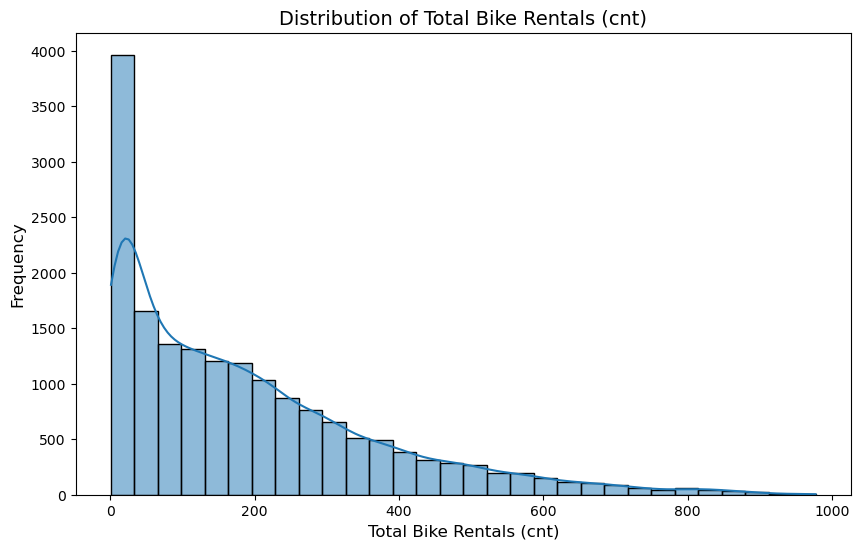

ValueError: could not convert string to float: '2011-01-01'

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# General overview: missing values and summary statistics
missing_values = bike_data.isnull().sum()
summary_stats = bike_data.describe()

# Target Variable Analysis: Distribution of 'cnt'
plt.figure(figsize=(10, 6))
sns.histplot(bike_data['cnt'], kde=True, bins=30)
plt.title('Distribution of Total Bike Rentals (cnt)', fontsize=14)
plt.xlabel('Total Bike Rentals (cnt)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Correlation with 'cnt'
correlation = bike_data.corr()['cnt'].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(bike_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

# Temporal Analysis: Rentals by hour
plt.figure(figsize=(10, 6))
sns.boxplot(data=bike_data, x='hr', y='cnt')
plt.title('Bike Rentals by Hour', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Bike Rentals (cnt)', fontsize=12)
plt.show()

# Weather Impact: Rentals vs temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bike_data, x='temp', y='cnt', hue='season', palette='viridis', alpha=0.6)
plt.title('Bike Rentals vs Temperature', fontsize=14)
plt.xlabel('Normalized Temperature (temp)', fontsize=12)
plt.ylabel('Total Bike Rentals (cnt)', fontsize=12)
plt.legend(title='Season', loc='upper left')
plt.show()

# Rentals by weather situation
plt.figure(figsize=(10, 6))
sns.boxplot(data=bike_data, x='weathersit', y='cnt')
plt.title('Bike Rentals by Weather Situation', fontsize=14)
plt.xlabel('Weather Situation', fontsize=12)
plt.ylabel('Total Bike Rentals (cnt)', fontsize=12)
plt.show()

# Display calculations
import ace_tools as tools; tools.display_dataframe_to_user(name="Summary Statistics and Missing Values", dataframe=summary_stats)
tools.display_dataframe_to_user(name="Correlation with Target Variable", dataframe=correlation)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



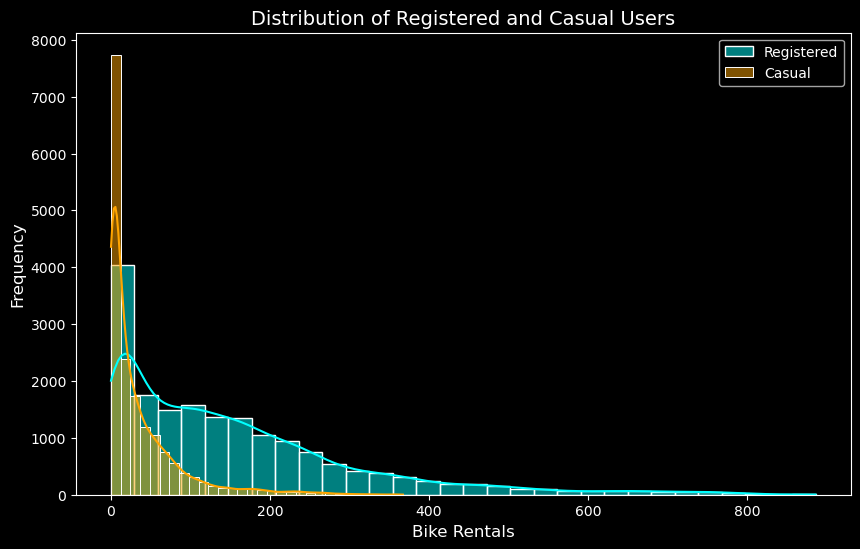

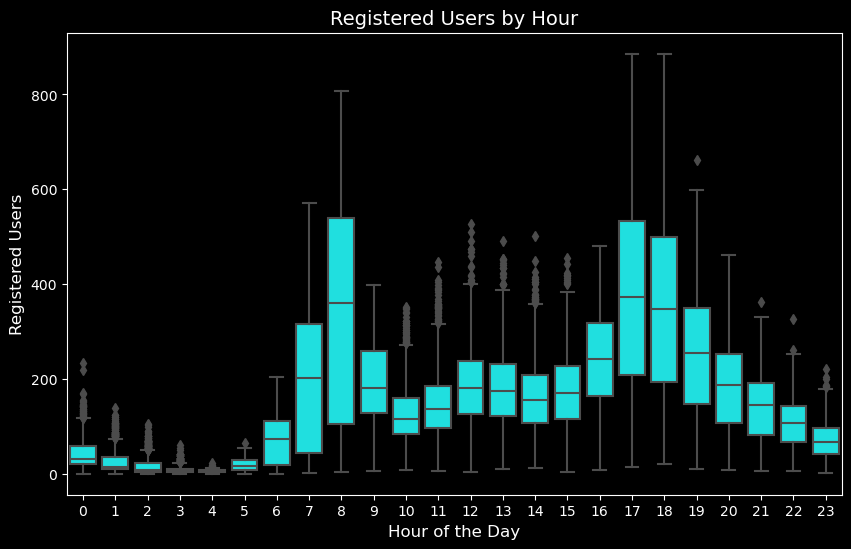

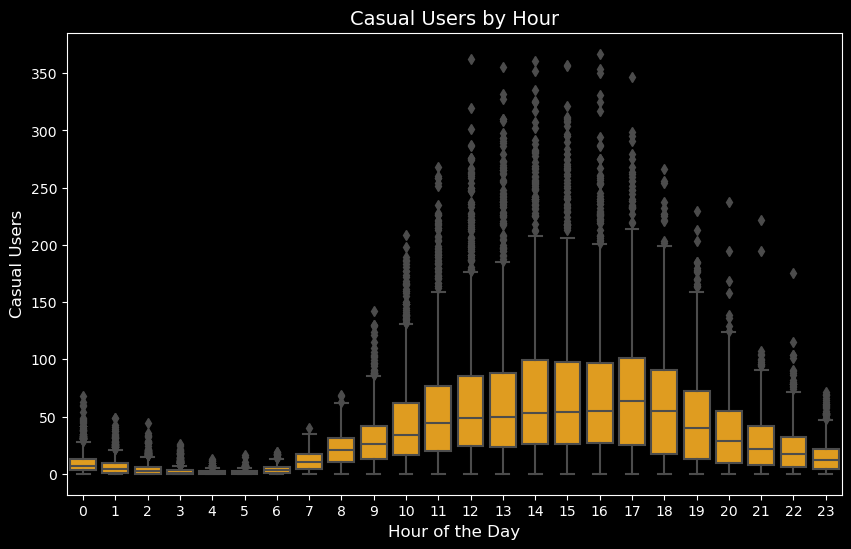

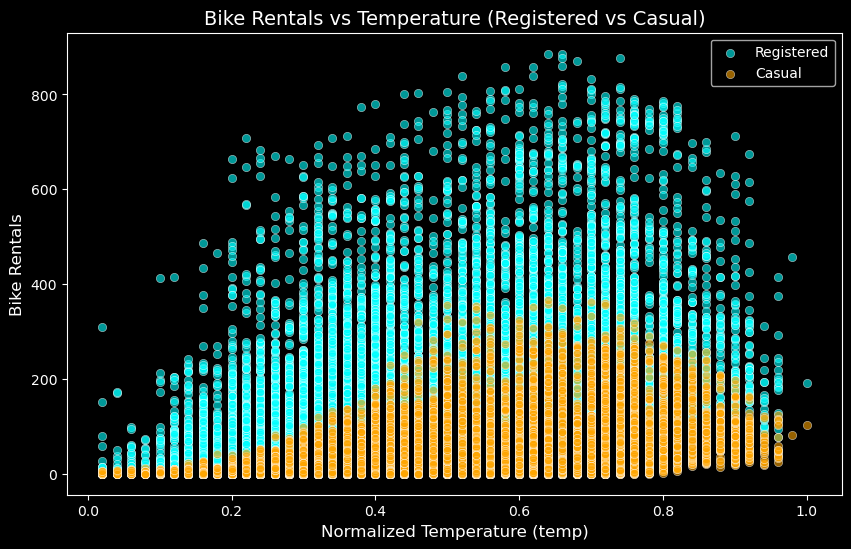

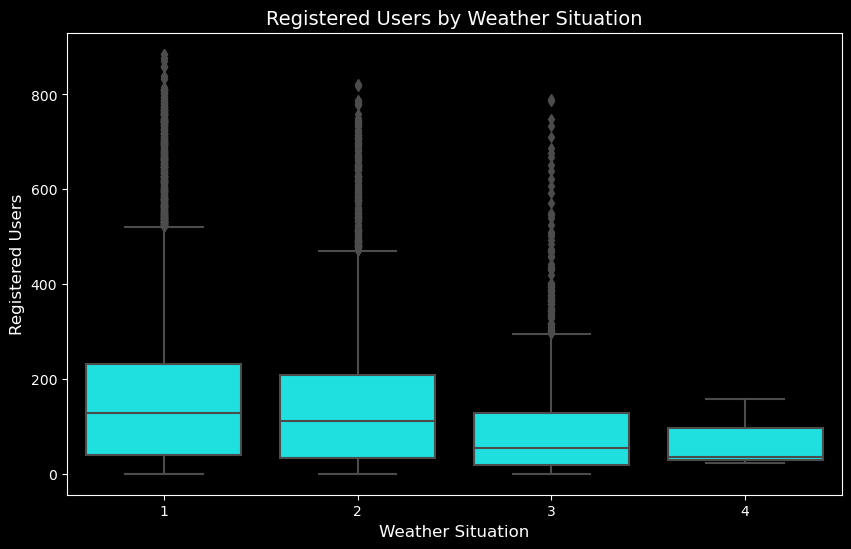

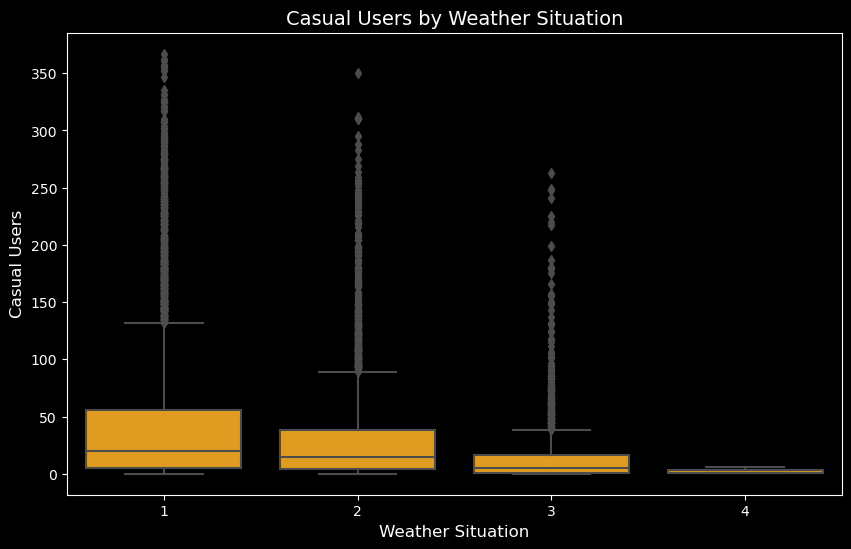

In [47]:
# Applying a black theme to visualizations
plt.style.use('dark_background')

# Target Variable Analysis: Distribution of 'registered' and 'casual'
plt.figure(figsize=(10, 6))
sns.histplot(bike_data['registered'], kde=True, bins=30, color='cyan', label='Registered')
sns.histplot(bike_data['casual'], kde=True, bins=30, color='orange', label='Casual')
plt.title('Distribution of Registered and Casual Users', fontsize=14, color='white')
plt.xlabel('Bike Rentals', fontsize=12, color='white')
plt.ylabel('Frequency', fontsize=12, color='white')
plt.legend()
plt.show()

# Rentals by hour for 'registered' and 'casual'
plt.figure(figsize=(10, 6))
sns.boxplot(data=bike_data, x='hr', y='registered', color='cyan')
plt.title('Registered Users by Hour', fontsize=14, color='white')
plt.xlabel('Hour of the Day', fontsize=12, color='white')
plt.ylabel('Registered Users', fontsize=12, color='white')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=bike_data, x='hr', y='casual', color='orange')
plt.title('Casual Users by Hour', fontsize=14, color='white')
plt.xlabel('Hour of the Day', fontsize=12, color='white')
plt.ylabel('Casual Users', fontsize=12, color='white')
plt.show()

# Rentals vs temperature for 'registered' and 'casual'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bike_data, x='temp', y='registered', color='cyan', alpha=0.6, label='Registered')
sns.scatterplot(data=bike_data, x='temp', y='casual', color='orange', alpha=0.6, label='Casual')
plt.title('Bike Rentals vs Temperature (Registered vs Casual)', fontsize=14, color='white')
plt.xlabel('Normalized Temperature (temp)', fontsize=12, color='white')
plt.ylabel('Bike Rentals', fontsize=12, color='white')
plt.legend()
plt.show()

# Rentals by weather situation for 'registered' and 'casual'
plt.figure(figsize=(10, 6))
sns.boxplot(data=bike_data, x='weathersit', y='registered', color='cyan')
plt.title('Registered Users by Weather Situation', fontsize=14, color='white')
plt.xlabel('Weather Situation', fontsize=12, color='white')
plt.ylabel('Registered Users', fontsize=12, color='white')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=bike_data, x='weathersit', y='casual', color='orange')
plt.title('Casual Users by Weather Situation', fontsize=14, color='white')
plt.xlabel('Weather Situation', fontsize=12, color='white')
plt.ylabel('Casual Users', fontsize=12, color='white')
plt.show()


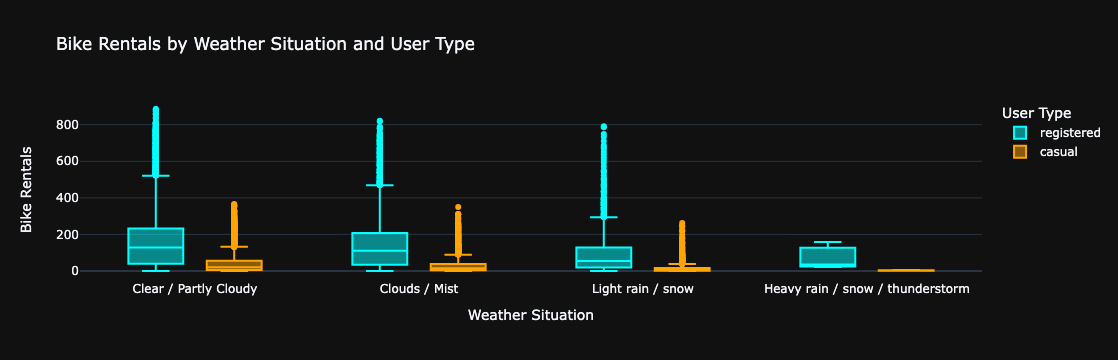

In [59]:
# Re-define label mappings as they were not in scope previously
label_mappings = {
    'season': {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'},
    'mnth': {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'},
    'weathersit': {1: 'Clear / Partly Cloudy', 2: 'Clouds / Mist', 3: 'Light rain / snow', 4: 'Heavy rain / snow / thunderstorm'},
    'yr': {0: '2011', 1: '2012'},
    'holiday': {0: 'Non-holidays', 1: 'Holidays'},
    'workingday': {0: 'Non-workdays', 1: 'Workdays'},
    'weekday': {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
}

# Apply label mappings to enhance EDA
bike_data_labeled = bike_data.copy()

for column, mapping in label_mappings.items():
    if column in bike_data_labeled.columns:
        bike_data_labeled[column] = bike_data_labeled[column].map(mapping)

import pandas as pd
import plotly.express as px

# Assuming you have the processed bike_data_labeled dataset
weather_situation_data = bike_data_labeled.melt(
    id_vars=['weathersit'],
    value_vars=['registered', 'casual'],
    var_name='User Type',
    value_name='Bike Rentals'
)

fig = px.box(
    weather_situation_data,
    x='weathersit',
    y='Bike Rentals',
    color='User Type',
    title='Bike Rentals by Weather Situation and User Type',
    labels={'weathersit': 'Weather Situation', 'Bike Rentals': 'Bike Rentals'},
    color_discrete_map={'registered': 'cyan', 'casual': 'orange'}
)

fig.update_layout(
    xaxis_title='Weather Situation',
    yaxis_title='Bike Rentals',
    legend_title='User Type',
    template='plotly_dark'
)

fig.show()

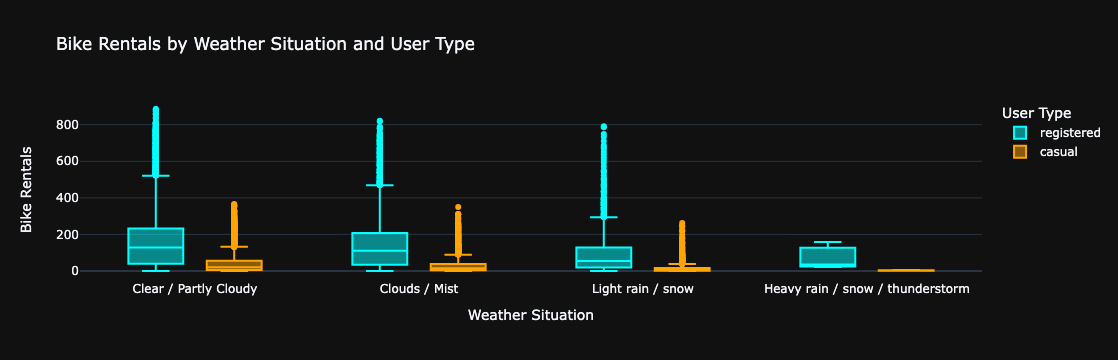

In [57]:
import pandas as pd
import plotly.express as px

# Assuming you have the processed bike_data_labeled dataset
weather_situation_data = bike_data_labeled.melt(
    id_vars=['weathersit'],
    value_vars=['registered', 'casual'],
    var_name='User Type',
    value_name='Bike Rentals'
)

fig = px.box(
    weather_situation_data,
    x='weathersit',
    y='Bike Rentals',
    color='User Type',
    title='Bike Rentals by Weather Situation and User Type',
    labels={'weathersit': 'Weather Situation', 'Bike Rentals': 'Bike Rentals'},
    color_discrete_map={'registered': 'cyan', 'casual': 'orange'}
)

fig.update_layout(
    xaxis_title='Weather Situation',
    yaxis_title='Bike Rentals',
    legend_title='User Type',
    template='plotly_dark'
)

fig.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



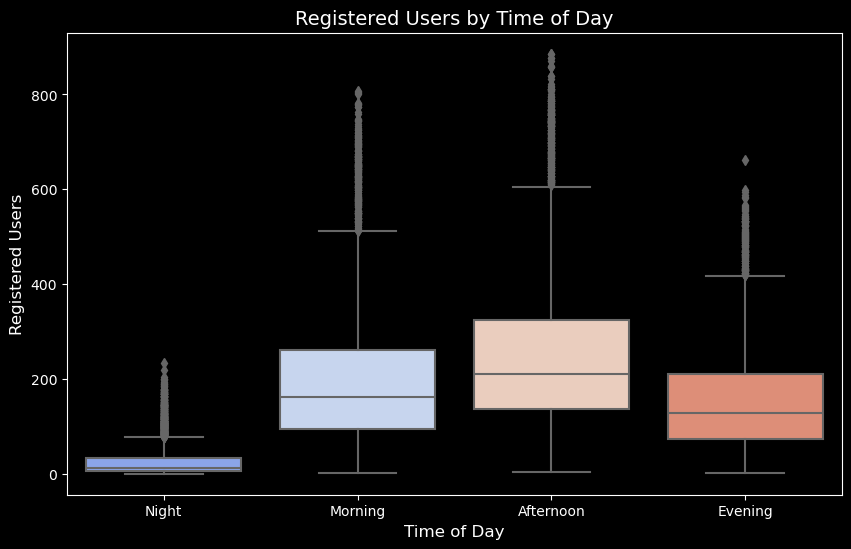

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



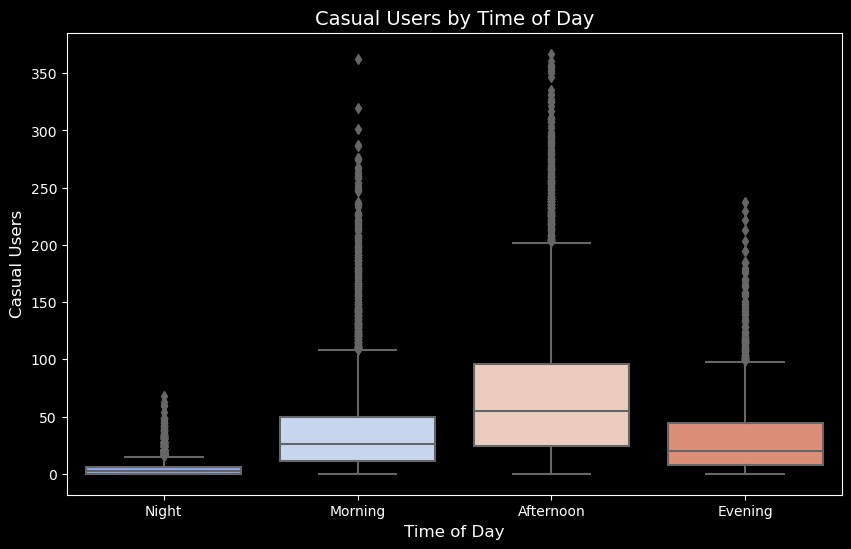

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



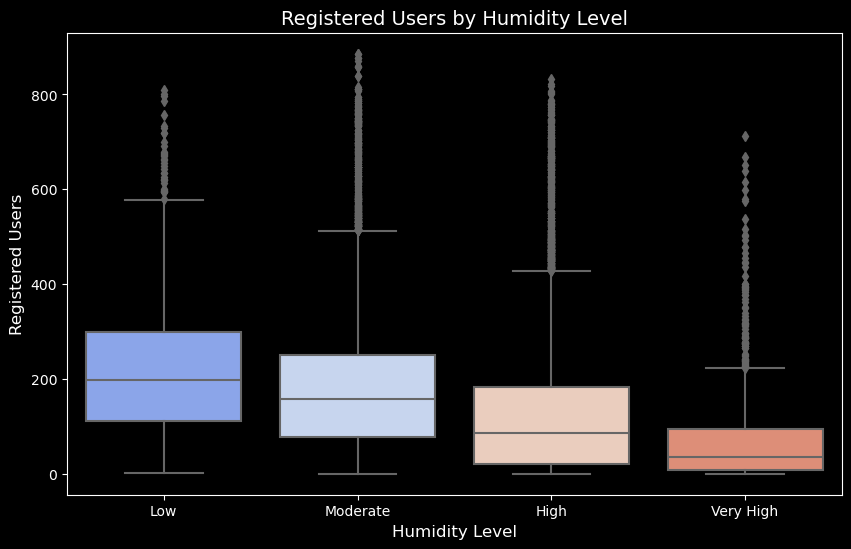

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



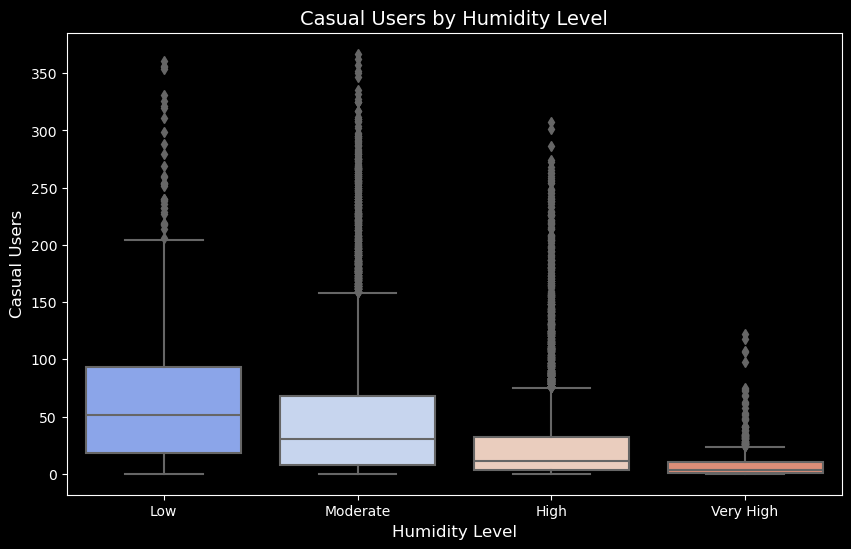

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



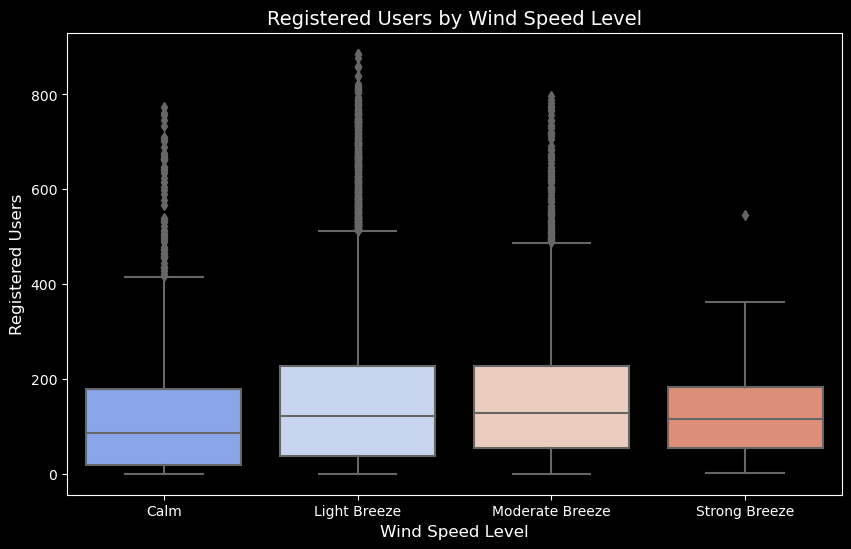

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



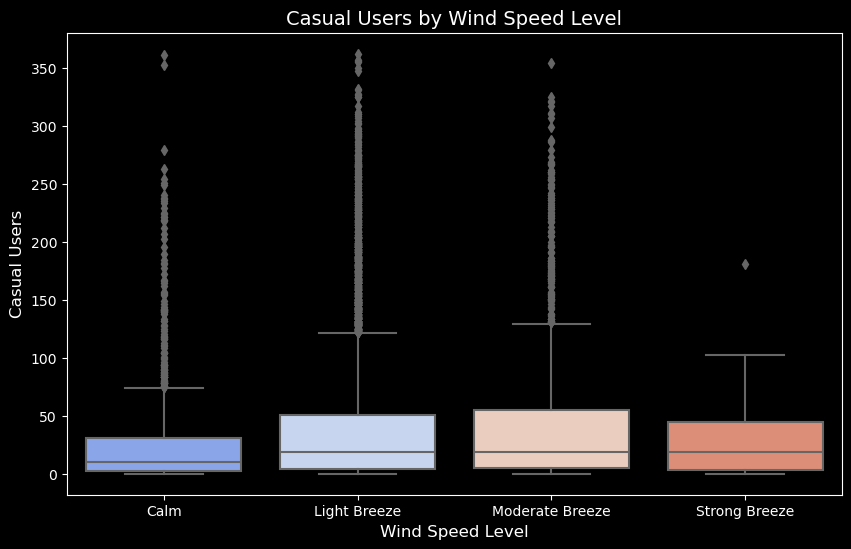

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



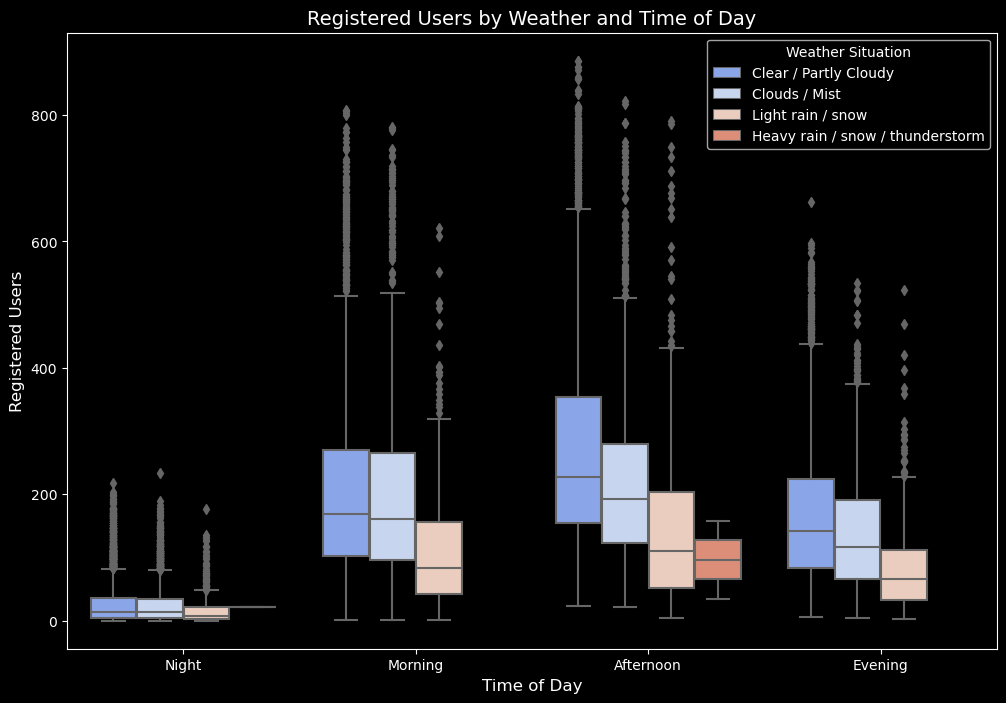

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



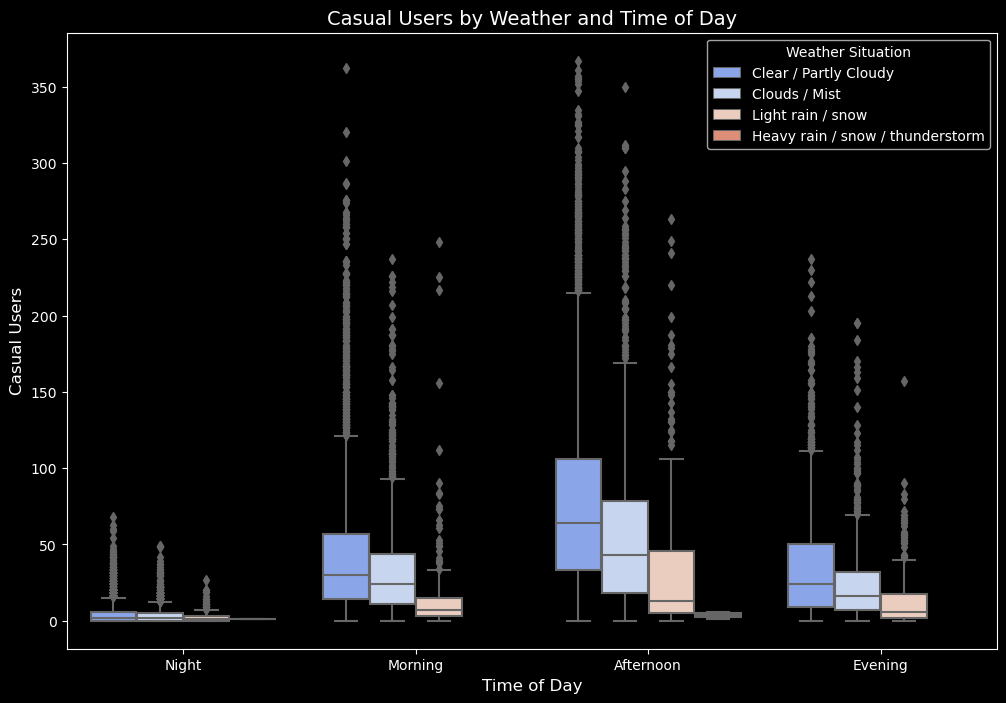

In [55]:
# Creating new columns for additional EDA
bike_data_labeled['hour_bin'] = pd.cut(bike_data['hr'], bins=[-1, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
bike_data_labeled['humidity_level'] = pd.cut(bike_data['hum'], bins=[0, 0.3, 0.6, 0.9, 1], labels=['Low', 'Moderate', 'High', 'Very High'])
bike_data_labeled['wind_level'] = pd.cut(bike_data['windspeed'], bins=[0, 0.1, 0.3, 0.6, 1], labels=['Calm', 'Light Breeze', 'Moderate Breeze', 'Strong Breeze'])

# EDA Ideas:
# 1. Analysis of bike rentals by time of day (hour_bin) for registered and casual users.
plt.figure(figsize=(10, 6))
sns.boxplot(data=bike_data_labeled, x='hour_bin', y='registered', palette='coolwarm')
plt.title('Registered Users by Time of Day', fontsize=14, color='white')
plt.xlabel('Time of Day', fontsize=12, color='white')
plt.ylabel('Registered Users', fontsize=12, color='white')
plt.show()

# Analysis of bike rentals by time of day (hour_bin) for registered and casual users
plt.figure(figsize=(10, 6))
sns.boxplot(data=bike_data_labeled, x='hour_bin', y='casual', palette='coolwarm')
plt.title('Casual Users by Time of Day', fontsize=14, color='white')
plt.xlabel('Time of Day', fontsize=12, color='white')
plt.ylabel('Casual Users', fontsize=12, color='white')
plt.show()

# 2. Impact of humidity levels on registered 
plt.figure(figsize=(10, 6))
sns.boxplot(data=bike_data_labeled, x='humidity_level', y='registered', palette='coolwarm')
plt.title('Registered Users by Humidity Level', fontsize=14, color='white')
plt.xlabel('Humidity Level', fontsize=12, color='white')
plt.ylabel('Registered Users', fontsize=12, color='white')
plt.show()

# Casual users
plt.figure(figsize=(10, 6))
sns.boxplot(data=bike_data_labeled, x='humidity_level', y='casual', palette='coolwarm')
plt.title('Casual Users by Humidity Level', fontsize=14, color='white')
plt.xlabel('Humidity Level', fontsize=12, color='white')
plt.ylabel('Casual Users', fontsize=12, color='white')
plt.show()

# Registered user by Wind speed Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=bike_data_labeled, x='wind_level', y='registered', palette='coolwarm')
plt.title('Registered Users by Wind Speed Level', fontsize=14, color='white')
plt.xlabel('Wind Speed Level', fontsize=12, color='white')
plt.ylabel('Registered Users', fontsize=12, color='white')
plt.show()

# Casual Users by Wind Speed Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=bike_data_labeled, x='wind_level', y='casual', palette='coolwarm')
plt.title('Casual Users by Wind Speed Level', fontsize=14, color='white')
plt.xlabel('Wind Speed Level', fontsize=12, color='white')
plt.ylabel('Casual Users', fontsize=12, color='white')
plt.show()

# 4. register users by weather and time of the day
plt.figure(figsize=(12, 8))
sns.boxplot(data=bike_data_labeled, x='hour_bin', y='registered', hue='weathersit', palette='coolwarm')
plt.title('Registered Users by Weather and Time of Day', fontsize=14, color='white')
plt.xlabel('Time of Day', fontsize=12, color='white')
plt.ylabel('Registered Users', fontsize=12, color='white')
plt.legend(title='Weather Situation')
plt.show()

# Casual Users by Weather and Time of Day
plt.figure(figsize=(12, 8))
sns.boxplot(data=bike_data_labeled, x='hour_bin', y='casual', hue='weathersit', palette='coolwarm')
plt.title('Casual Users by Weather and Time of Day', fontsize=14, color='white')
plt.xlabel('Time of Day', fontsize=12, color='white')
plt.ylabel('Casual Users', fontsize=12, color='white')
plt.legend(title='Weather Situation')
plt.show()